In [1]:
import numpy as np
from numpy.random import RandomState, SeedSequence, MT19937
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def OU_1(dt, alpha, mu, c, N, random_state = None):
    coeff = np.array([alpha * mu * dt, 1 / (1 + alpha * dt)])
    if random_state is not None:
        rnd = c * np.sqrt(dt) * random_state.normal(size=N)
    else:
        rnd = c * np.sqrt(dt) * np.random.normal(size=N)
    ou = np.zeros(N)
    for i in range(N-1):
        ou[i+1] = (ou[i] + coeff[0] + rnd[i]) * coeff[1]
    return ou

In [3]:
def OU_2(dt, mean, stddev, tau, N, random_state = None):
    if random_state is not None:
        rnd = random_state.normal(size=N)
    else:
        rnd = np.random.normal(size=N)
    const = 2 * stddev**2 / tau
    mu = np.exp(-dt / tau)
    coeff = np.sqrt(const * tau / 2 * (1 - mu ** 2))
    ou = np.zeros(N)
    for i in range(N-1):
        ou[i+1] = mean + mu * (ou[i] - mean) + coeff * rnd[i]
    return ou

In [4]:
def OU_TH(dt, alpha, mu, c, N, random_state = None):
    t = np.arange(N) * dt
    ex = np.exp(-alpha * t)
    if random_state is not None:
        rnd = random_state.normal(size=N-1)
    else:
        rnd = np.random.normal(size=N-1)
    ou0 = 0
    tmp = np.cumsum(np.r_[0, np.sqrt(np.diff(np.exp(2 * alpha * t) - 1)) * rnd])
    ou = ou0 * ex + mu * (1 - ex) + c * ex * tmp / np.sqrt(2 * alpha);
    return ou

In [5]:
def OU_SDE(dt, alpha, mu, c, N, random_state = None):
    if random_state is not None:
        rnd = c * np.sqrt(dt) * random_state.normal(size=N-1)
    else:
        rnd = c * np.sqrt(dt) * np.random.normal(size=N-1)
    ou = np.zeros(N)
    for i in range(N-1):
        ou[i+1] = ou[i] + alpha * (mu - ou[i]) * dt + rnd[i];
    return ou

In [6]:
dt = 0.01
tend = 5
t = np.r_[0 : tend : dt]
N = t.size
seed = 5061983
alpha = 0.5
mu = 0.2
c = 0.5

In [7]:
N_trials = 100
rs = RandomState(MT19937(SeedSequence(seed)))
seeds = rs.randint(low=0, high=100000, size=N_trials)

In [8]:
ou_1 = np.array([OU_1(dt, alpha, mu, c, N, RandomState(MT19937(SeedSequence(seed)))) for seed in seeds])

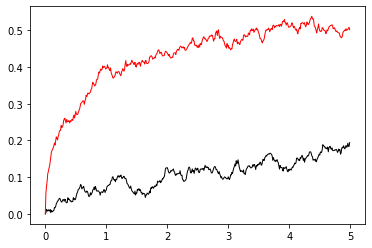

In [9]:
plt.plot(t, ou_1.mean(axis=0), 'k', lw=1)
plt.plot(t, ou_1.std(axis=0), 'r', lw=1)

In [10]:
mean = mu
stddev = c
tau = 1 / alpha
ou_2 = np.array([OU_2(dt, mean, stddev, tau, N, RandomState(MT19937(SeedSequence(seed)))) for seed in seeds])

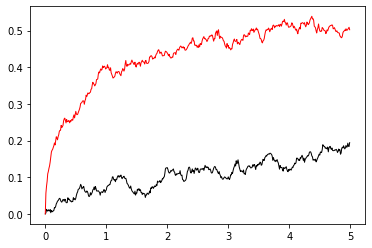

In [11]:
plt.plot(t, ou_2.mean(axis=0), 'k', lw=1)
plt.plot(t, ou_2.std(axis=0), 'r', lw=1)

In [12]:
ou_th = np.array([OU_TH(dt, alpha, mu, c, N, RandomState(MT19937(SeedSequence(seed)))) for seed in seeds])

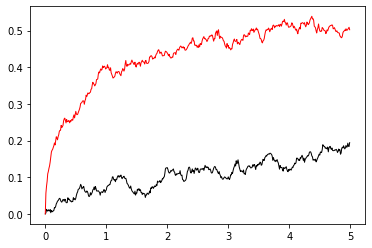

In [13]:
plt.plot(t, ou_th.mean(axis=0), 'k', lw=1)
plt.plot(t, ou_th.std(axis=0), 'r', lw=1)

In [14]:
ou_sde = np.array([OU_SDE(dt, alpha, mu, c, N, RandomState(MT19937(SeedSequence(seed)))) for seed in seeds])

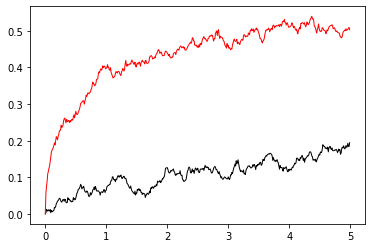

In [15]:
plt.plot(t, ou_sde.mean(axis=0), 'k', lw=1)
plt.plot(t, ou_sde.std(axis=0), 'r', lw=1)

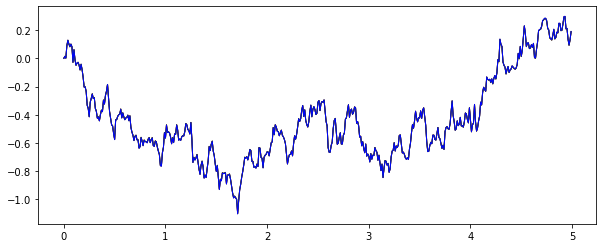

In [16]:
fig,ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(t, ou_1[0], 'k', lw=1)
ax.plot(t, ou_2[0], 'r', lw=1)
ax.plot(t, ou_th[0], 'g', lw=1)
ax.plot(t, ou_sde[0], 'b', lw=1)

In [17]:
ou_1[0][:10]

array([ 0.        ,  0.01440719,  0.00154613,  0.09064716,  0.12842682,
        0.1019596 ,  0.08237029,  0.10119033,  0.08223981, -0.02763989])

In [18]:
ou_2[0][:10]

array([ 0.        ,  0.0144431 ,  0.0015498 ,  0.09087291,  0.12874562,
        0.10221084,  0.08257145,  0.10143739,  0.0824384 , -0.02771619])

In [19]:
ou_th[0][:10]

array([ 0.        ,  0.0144431 ,  0.0015498 ,  0.09087291,  0.12874562,
        0.10221084,  0.08257145,  0.10143739,  0.0824384 , -0.02771619])

In [20]:
ou_sde[0][:10]

array([ 0.        ,  0.01447922,  0.0015535 ,  0.09109999,  0.12906629,
        0.10246354,  0.08277377,  0.10168588,  0.08263813, -0.02779296])